In [1]:
#import keras

import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
#import data

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_labels)

8982

In [4]:
len(test_data)

2246

In [5]:
#format data and results
import numpy as np

def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1.
    return results
    
x_train= vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)
    

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [7]:
#import keras settings

from keras import models
from keras import layers

#define model and layers

model=models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# compile

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 560us/step - loss: 1.5401 - acc: 0.6647 - val_loss: 1.0872 - val_acc: 0.7650
Epoch 2/20
7982/7982 [==============================] - 3s 413us/step - loss: 0.7485 - acc: 0.8358 - val_loss: 0.8830 - val_acc: 0.8140
Epoch 3/20
7982/7982 [==============================] - 4s 442us/step - loss: 0.4493 - acc: 0.9048 - val_loss: 0.8521 - val_acc: 0.8310
Epoch 4/20
7982/7982 [==============================] - 4s 470us/step - loss: 0.2970 - acc: 0.9349 - val_loss: 0.8722 - val_acc: 0.8270
Epoch 5/20
7982/7982 [==============================] - 3s 426us/step - loss: 0.2185 - acc: 0.9455 - val_loss: 1.0268 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 4s 448us/step - loss: 0.1870 - acc: 0.9516 - val_loss: 0.8949 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 4s 467us/step - loss: 0.1687 - a

In [16]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 132us/step


[1.628815798704261, 0.7778272484947504]

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(*args, **kw)>

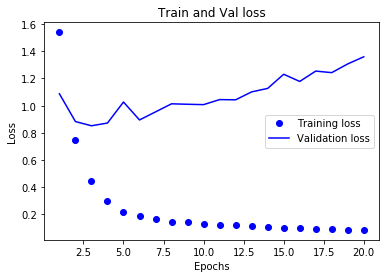

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Train and Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show



<function matplotlib.pyplot.show(*args, **kw)>

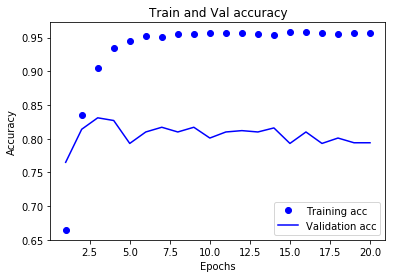

In [14]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Train and Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [15]:
predictions=model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3
